In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from constants import DATA_DIR
from numpy.polynomial import Chebyshev
from scipy.interpolate import CubicSpline, make_interp_spline

from astrofit.model.enums import EnumSortOptions
from astrofit.utils import AsteroidLoader, LightcurveBinner, LightcurvePlotter

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [2]:
asteroid_loader = AsteroidLoader(DATA_DIR)
lightcurve_binner = LightcurveBinner()
lightcurve_plotter = LightcurvePlotter()

In [3]:
asteroid_name = "Kalliope"


In [4]:
asteroid = asteroid_loader.load_asteroid(asteroid_name)
asteroid

Asteroid(id=22, name=Kalliope, period=4.1482015, lightcurves=155)

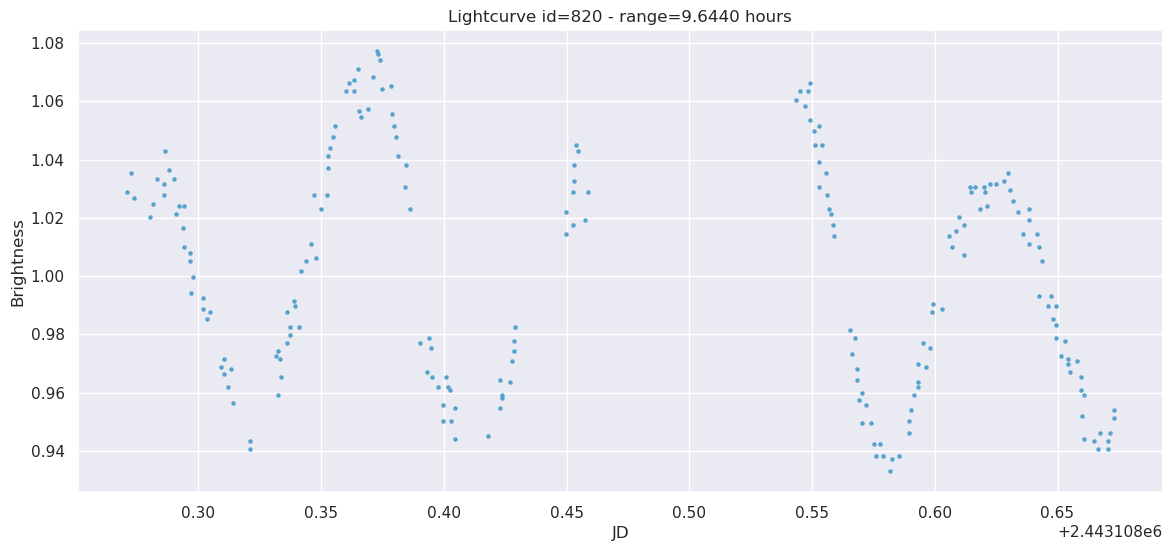

In [5]:
asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).plot()

In [6]:
times = np.array(asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).time_arr)
brightness = np.array(asteroid.get_longest_lightcurve(by=EnumSortOptions.PERIOD).brightness_arr)

In [7]:
def get_uniformly_distributed_data(
    times: np.ndarray,
    brightness: np.ndarray,
    resolution: float = 0.002,
    plot: bool = False,
) -> tuple[np.ndarray, np.ndarray]:
    times_resolution = np.arange(times[0], times[-1] + 0.001, resolution)

    reduced_times = []
    reduced_brightness = []

    prev_time = times_resolution[0]
    for curr_time in times_resolution[1:]:
        mask = np.where((times >= prev_time) & (times < curr_time), True, False)
        if np.any(mask):
            # reduced_times.append(np.mean(times[mask]))
            reduced_times.append(prev_time + (curr_time - prev_time) / 2)
            reduced_brightness.append(np.mean(brightness[mask]))

        prev_time = curr_time

    reduced_times = np.array(reduced_times)
    reduced_brightness = np.array(reduced_brightness)

    if plot:
        plt.scatter(times, brightness, s=8)
        plt.vlines(times_resolution, min(brightness), max(brightness), alpha=0.5)
        plt.show()

        plt.scatter(reduced_times, reduced_brightness, s=8)
        plt.show()

    return reduced_times, reduced_brightness

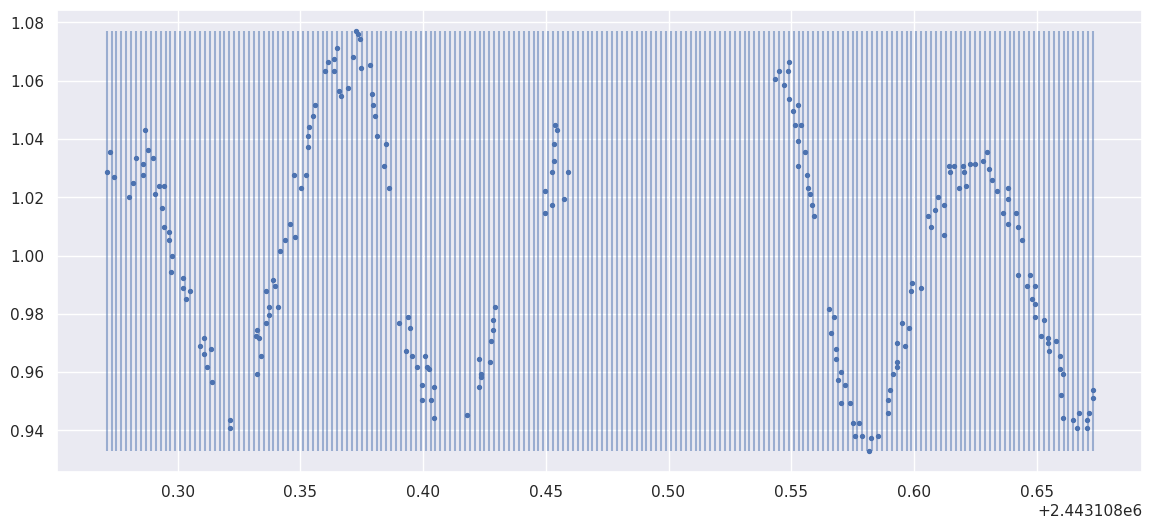

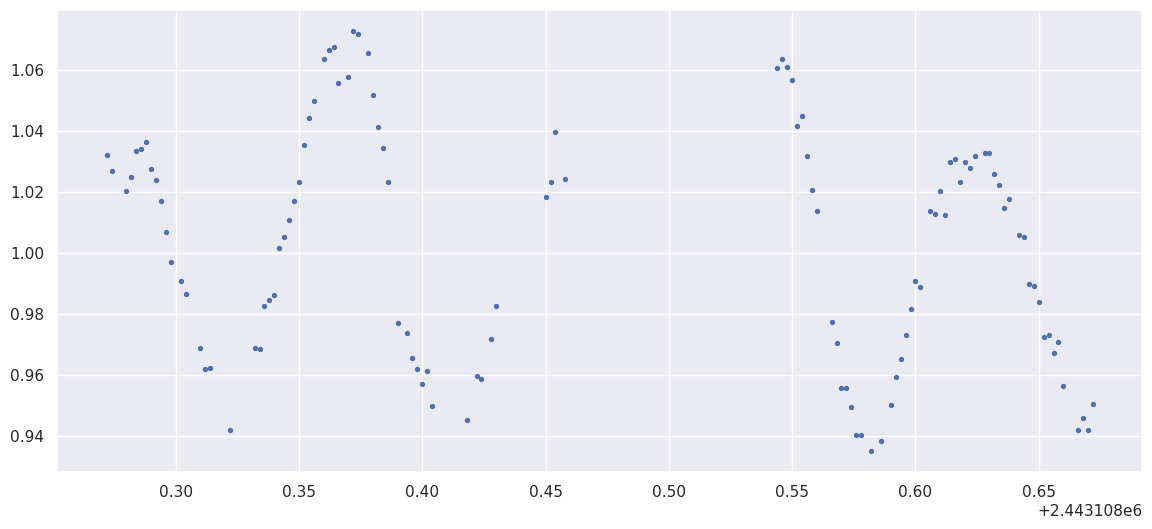

In [8]:
reduced_times, reduced_brightness = get_uniformly_distributed_data(times, brightness, plot=True)

In [9]:
times_resolution = np.arange(reduced_times[0], reduced_times[-1] + 0.001, 0.002)

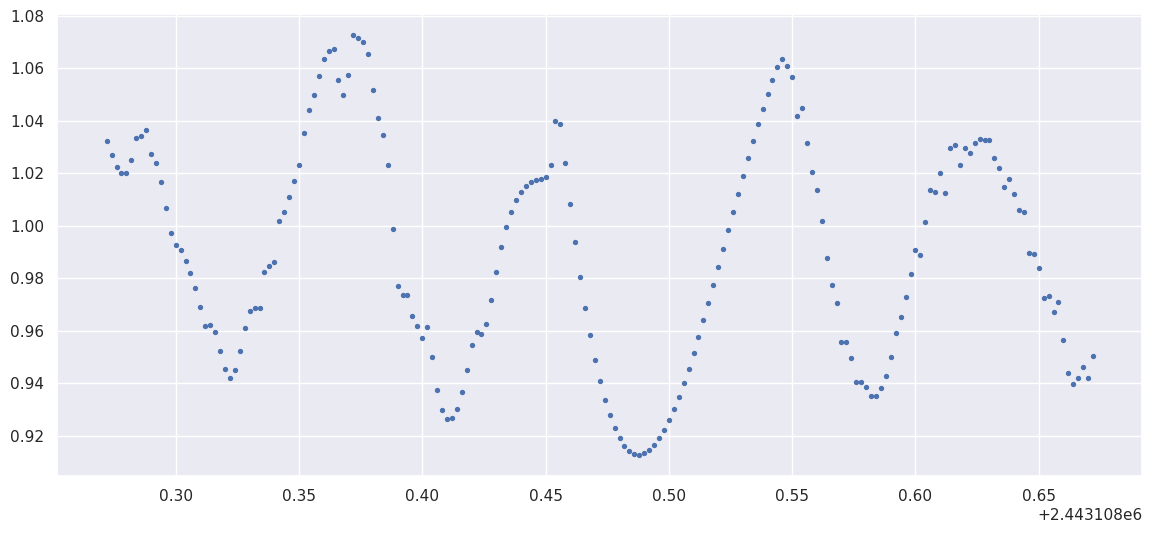

In [10]:
cubic_spline = CubicSpline(reduced_times, reduced_brightness)
brightness_test = cubic_spline(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

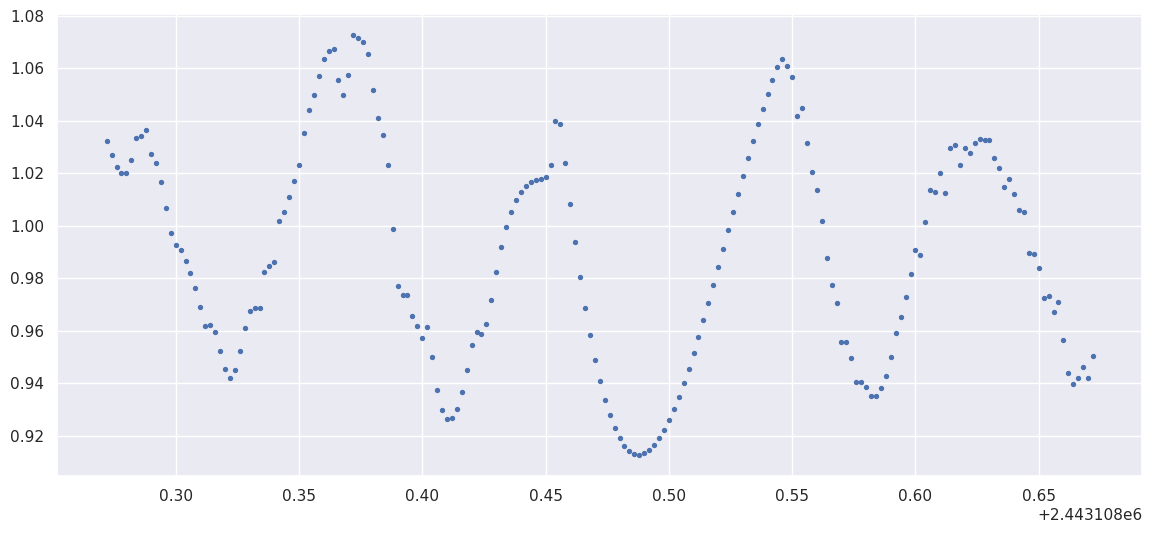

In [11]:
bspl = make_interp_spline(reduced_times, reduced_brightness, k=3)
brightness_test = bspl(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)

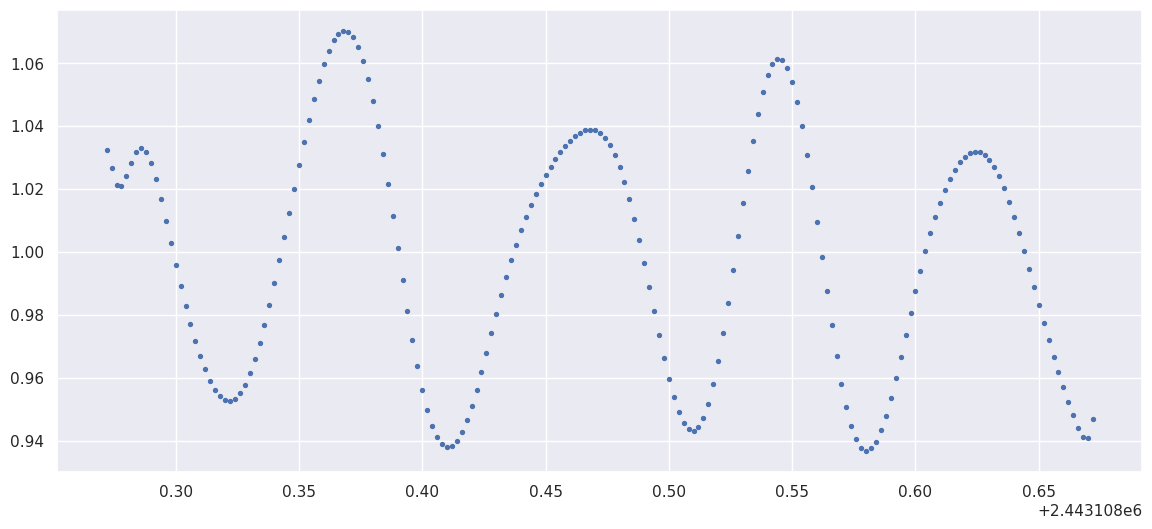

In [12]:
c = Chebyshev.fit(times, brightness, 25)
brightness_test = c(times_resolution)

_ = plt.scatter(times_resolution, brightness_test, s=8)